#**Linear Regression**



## **1. Loading Modules**







In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **2. Importing and Handling Data**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')            # mounting google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/linear_regression_train.csv', delimiter = ',')       # reading train set
df = df.drop(columns = ['ID'])

print(df.shape)

(48000, 26)


`Correlation Matrix`

In [ ]:
df.corr()

Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
Feature_1    1.000000   0.003750  -0.007193  -0.011171  -0.000805  -0.003489   
Feature_2    0.003750   1.000000   0.008600  -0.003447   0.007095   0.001080   
Feature_3   -0.007193   0.008600   1.000000  -0.002682   0.000938   0.006591   
Feature_4   -0.011171  -0.003447  -0.002682   1.000000   0.004510   0.002015   
Feature_5   -0.000805   0.007095   0.000938   0.004510   1.000000  -0.000779   
Feature_6   -0.003489   0.001080   0.006591   0.002015  -0.000779   1.000000   
Feature_7    0.008054  -0.001268  -0.002834  -0.007309   0.002030   0.005044   
Feature_8    0.007464   0.002993  -0.001909  -0.007768  -0.002403   0.012545   
Feature_9   -0.003614  -0.004500  -0.004692  -0.006608  -0.003044  -0.001483   
Feature_10   0.001734   0.004998   0.007559  -0.004397  -0.009072   0.000491   
Feature_11  -0.003710   0.004040   0.003190  -0.003842  -0.000580  -0.005318   
Feature_12  -0.010590   0.000940   0.000059   0.006411   0.004246   0.008823   
Feature_13   0.005963   0.005267  -0.007660  -0.008072  -0.002822  -0.000845   
Feature_14  -0.003295   0.001070   0.000487   0.001547   0.000863  -0.002648   
Feature_15   0.003748   0.006524  -0.005647  -0.003489   0.004685  -0.004000   
Feature_16   0.001963   0.001928  -0.003957   0.004812   0.010631  -0.004034   
Feature_17  -0.000125   0.002971  -0.006656  -0.003266  -0.011821  -0.004821   
Feature_18   0.001076   0.003875   0.004621   0.003071   0.001751   0.003872   
Feature_19   0.002156   0.003435   0.002366  -0.003333  -0.007260  -0.003202   
Feature_20  -0.007123   0.002111  -0.001443  -0.000683   0.001940   0.001932   
Feature_21   0.001413  -0.000580  -0.008878  -0.003133  -0.006270  -0.004659   
Feature_22  -0.000281  -0.000007  -0.001483   0.005046  -0.002889  -0.003125   
Feature_23   0.002608   0.008454   0.005715  -0.000858  -0.004368   0.002053   
Feature_24   0.001077   0.005624   0.002471  -0.002296   0.002904   0.004182   
Feature_25  -0.006085   0.001643   0.008080   0.003821  -0.001597  -0.007828   
Target       0.054712   0.007267   0.240100   0.334281   0.001245   0.378366   

            Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_17  \
Feature_1    0.008054   0.007464  -0.003614    0.001734  ...   -0.000125   
Feature_2   -0.001268   0.002993  -0.004500    0.004998  ...    0.002971   
Feature_3   -0.002834  -0.001909  -0.004692    0.007559  ...   -0.006656   
Feature_4   -0.007309  -0.007768  -0.006608   -0.004397  ...   -0.003266   
Feature_5    0.002030  -0.002403  -0.003044   -0.009072  ...   -0.011821   
Feature_6    0.005044   0.012545  -0.001483    0.000491  ...   -0.004821   
Feature_7    1.000000   0.001026   0.003775   -0.001553  ...   -0.002593   
Feature_8    0.001026   1.000000  -0.004938    0.003618  ...    0.001917   
Feature_9    0.003775  -0.004938   1.000000    0.005088  ...    0.003607   
Feature_10  -0.001553   0.003618   0.005088    1.000000  ...    0.002636   
Feature_11  -0.000144   0.005890   0.003019   -0.000115  ...    0.007194   
Feature_12   0.004554  -0.002072  -0.005995    0.001720  ...    0.006387   
Feature_13   0.000914   0.004865   0.000817    0.002946  ...   -0.003853   
Feature_14  -0.001947  -0.003785  -0.001688   -0.001188  ...   -0.001310   
Feature_15  -0.000657  -0.001752   0.000833    0.003338  ...   -0.005552   
Feature_16  -0.001520  -0.006931   0.000099   -0.001755  ...    0.007541   
Feature_17  -0.002593   0.001917   0.003607    0.002636  ...    1.000000   
Feature_18  -0.001540   0.011005  -0.003211    0.001651  ...    0.000815   
Feature_19   0.001474  -0.000791   0.009532    0.000318  ...   -0.000840   
Feature_20   0.009610   0.005960  -0.009195    0.002329  ...   -0.002164   
Feature_21  -0.007858  -0.000989   0.008632    0.006820  ...    0.005099   
Feature_22  -0.002765  -0.001685  -0.006531   -0.007519  ...   -0.004948   
Feature_23   0.009628  -0.003699  -0.002328   -0.006887  ...   -0.008889   
Feature_24   0.002787   0.0



`Dividing Data into Train, CV and Test Set`













In [ ]:
print('TRAIN SET')
print(df.iloc[:38400])

print()
print()

print('CROSS VALIDATION SET')
print(df.iloc[38400:43200])

print()
print()

print('TEST SET')
print(df.iloc[43200:])

TRAIN SET
       Feature_1  Feature_2   Feature_3   Feature_4  Feature_5  Feature_6  \
0     -10.429837  21.684251   93.056324  128.914740   1.657315 -34.602633   
1      12.475081  11.652011  -47.621889  -21.892583 -25.844861 -46.951253   
2       7.696188  24.729547   43.782383  -53.282523 -69.145794 -57.072335   
3       6.505033  22.092605  -25.161422    4.742729 -20.344550 -50.248793   
4       5.906445  19.909180   24.705865  -51.875251 -24.857500 -25.879977   
...          ...        ...         ...         ...        ...        ...   
38395  12.744364  23.435610   70.218297   32.787033 -36.887105 -48.919114   
38396   7.741272  10.847826  101.785477   20.070854  -7.562581 -43.606421   
38397  22.401243  25.658743   60.045470   -7.172349 -36.571362 -28.920165   
38398   5.558942  17.108521    4.453497  -67.902497 -39.708555 -19.818320   
38399   9.070472  25.433550   64.654783  -92.928482 -29.742645 -55.775228   

        Feature_7   Feature_8   Feature_9  Feature_10  ...  Featu

In [ ]:
df_train = df.iloc[:38400]
df_cv = df.iloc[38400:43200]
df_test = df.iloc[43200:]




`Arranging Dataset as an array`




In [ ]:
features_train = df_train.loc[:, 'Feature_1':'Feature_25']

x_train = features_train.to_numpy()
y_train = df_train['Target'].to_numpy()

print(f"x_train = {x_train}")
print()
print(f"y_train = {y_train}")

x_train = [[ -10.42983652   21.68425064   93.05632423 ...  -99.42351759
   -41.15065424  113.11719747]
 [  12.47508125   11.65201123  -47.62188868 ...  -97.69430387
    13.81611278    8.71189399]
 [   7.69618811   24.72954661   43.78238349 ... -100.87486091
   -38.8955983    34.4883343 ]
 ...
 [  22.4012425    25.65874334   60.04547014 ... -104.09754548
   -18.10980651   -6.88924878]
 [   5.55894173   17.10852093    4.45349705 ...  -98.54878075
   -45.98647787  -19.20804632]
 [   9.07047177   25.43355012   64.65478309 ... -102.18851553
  -100.99889955  -55.0839879 ]]

y_train = [ 5235.69092808 -1221.44214589 -1102.75886179 ...  2427.93795728
  1013.63617602 -1773.2025304 ]




`Applying z-score normalization to avoid overflow in Cost Computing`











In [ ]:
mean_train = x_train.mean(axis=0)
std_train = x_train.std(axis=0)

x_train = (x_train - mean_train) / std_train

print(f"x_train = {x_train}")

x_train = [[-1.69206312  0.25244802  1.14205408 ... -0.22425525 -0.47590366
   2.26466532]
 [ 0.67471046 -1.49306916 -2.09862087 ...  0.15018497  0.88288557
  -0.2083085 ]
 [ 0.18090567  0.78230145  0.00697551 ... -0.53852601 -0.42015824
   0.40223962]
 ...
 [ 1.70038435  0.94397312  0.38161332 ... -1.23635919  0.0936706
  -0.57784162]
 [-0.03993678 -0.54368677 -0.89900797 ... -0.03484162 -0.59544616
  -0.86962818]
 [ 0.32291091  0.90479157  0.48779383 ... -0.82298195 -1.95536399
  -1.71939597]]


## **3. Visualising the Data**

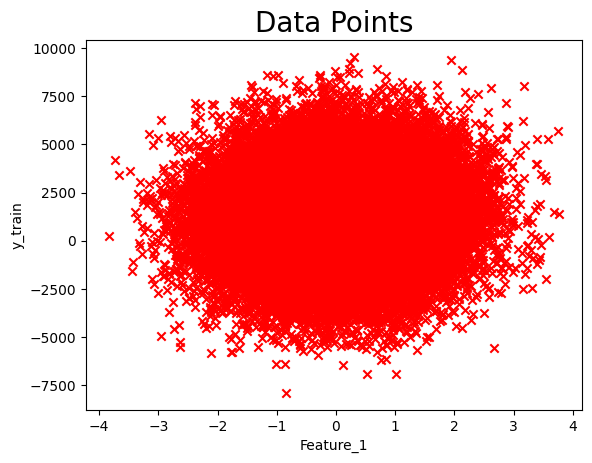

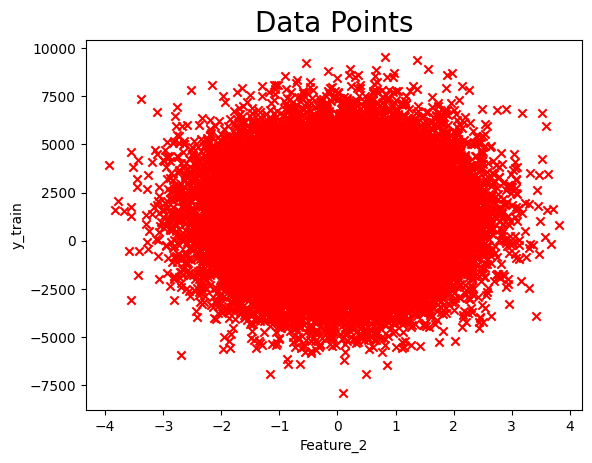

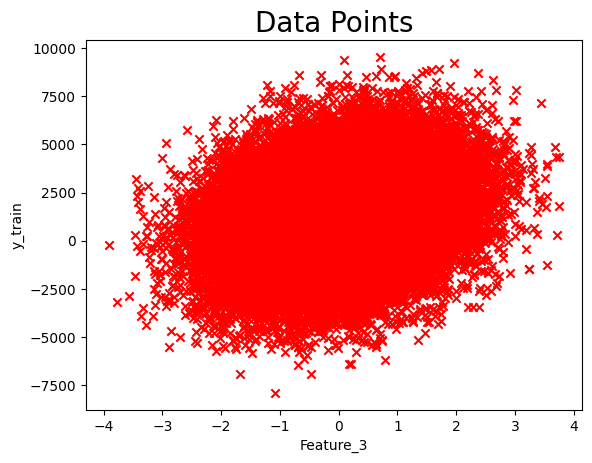

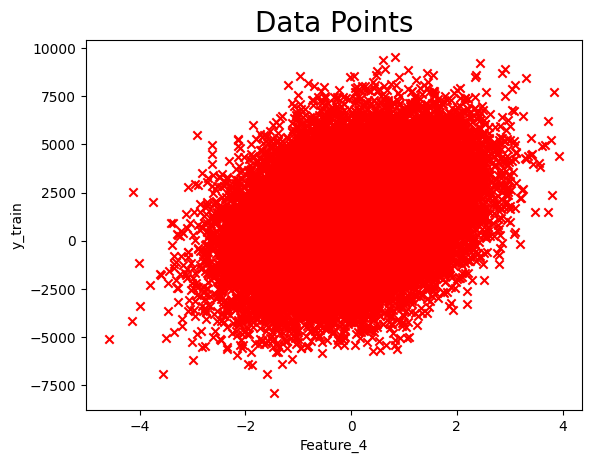

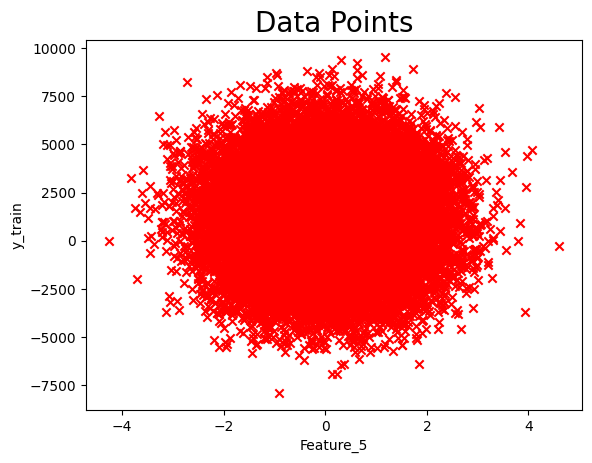

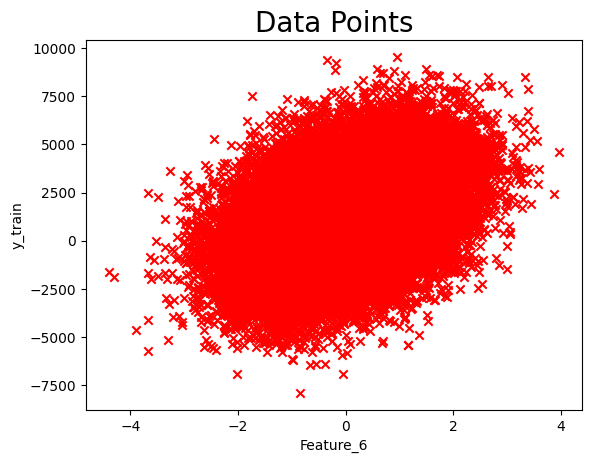

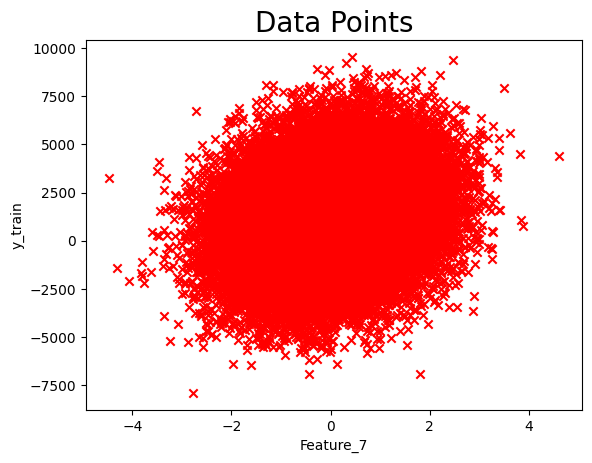

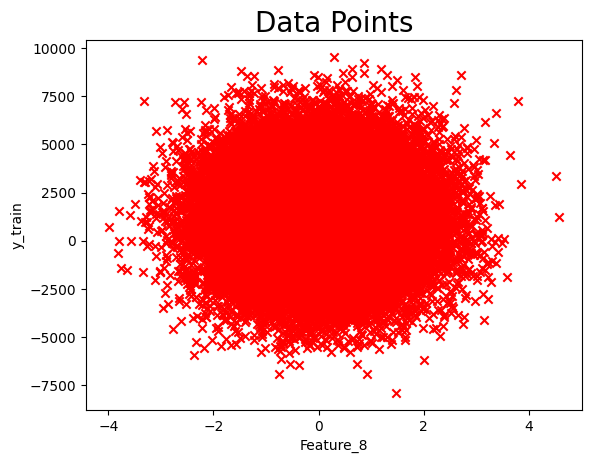

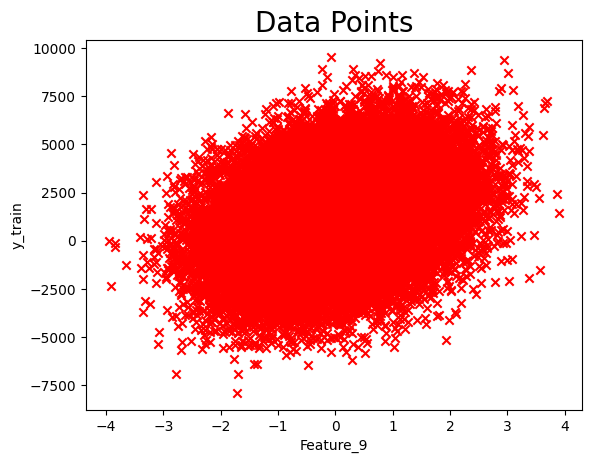

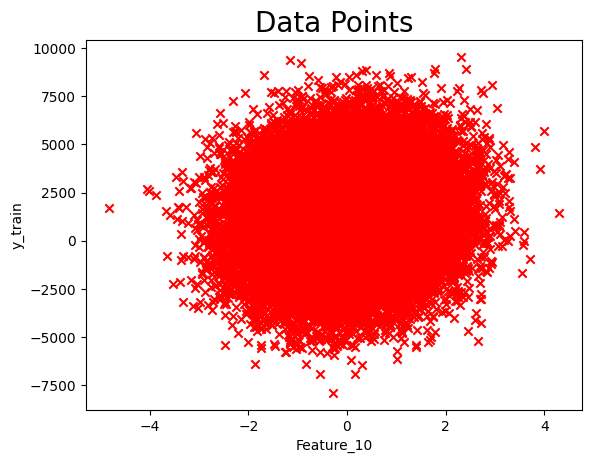

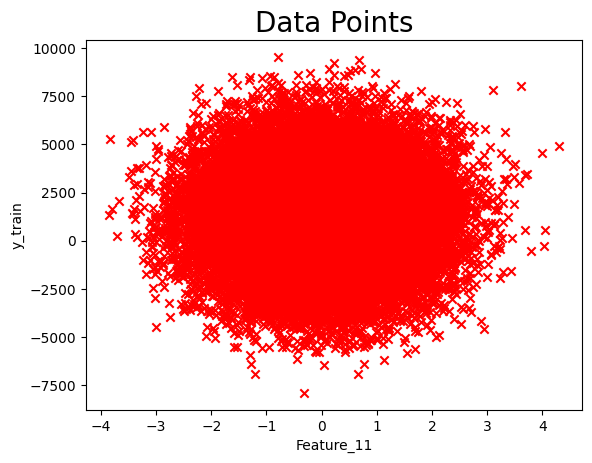

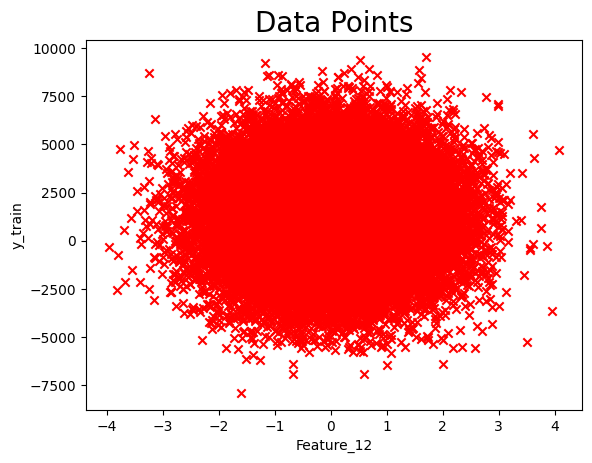

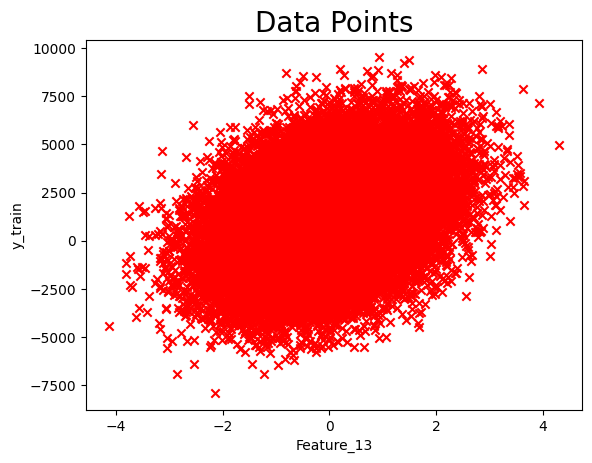

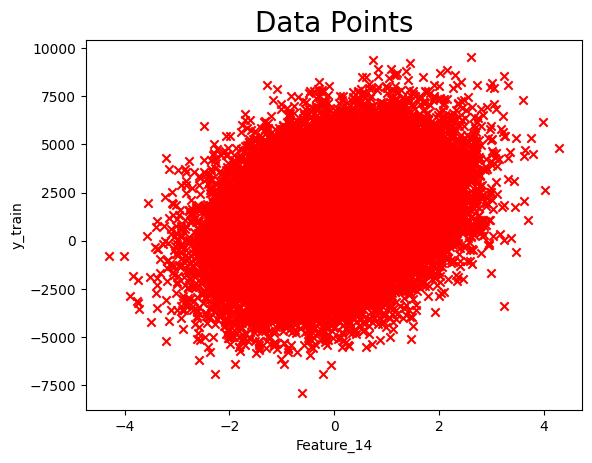

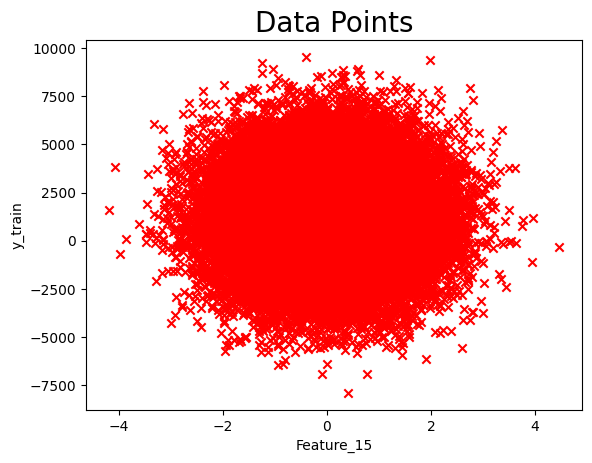

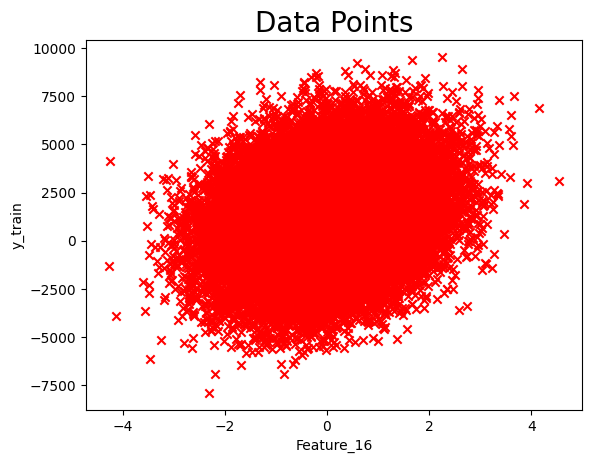

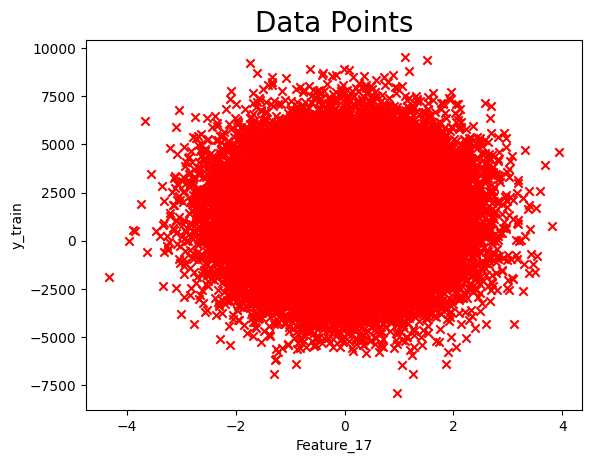

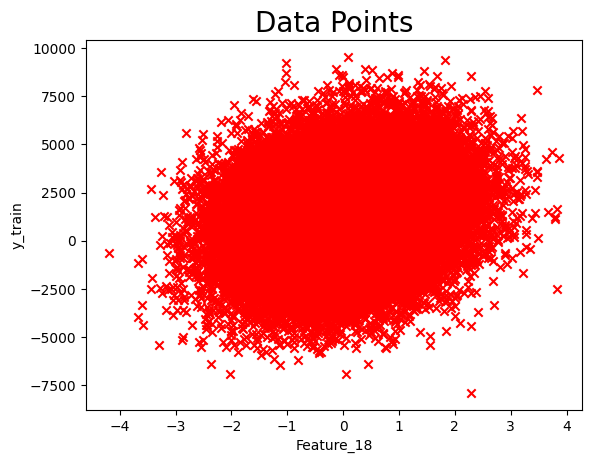

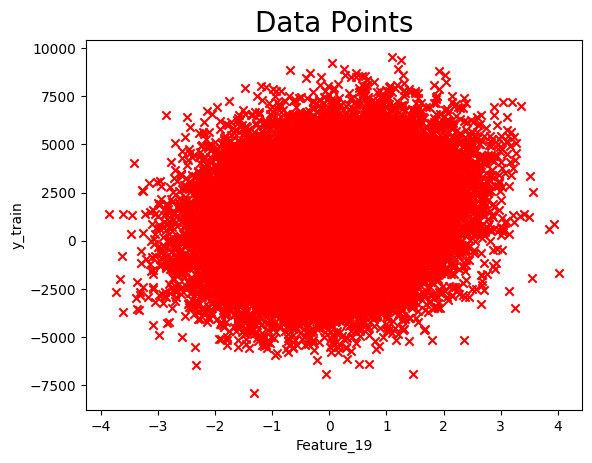

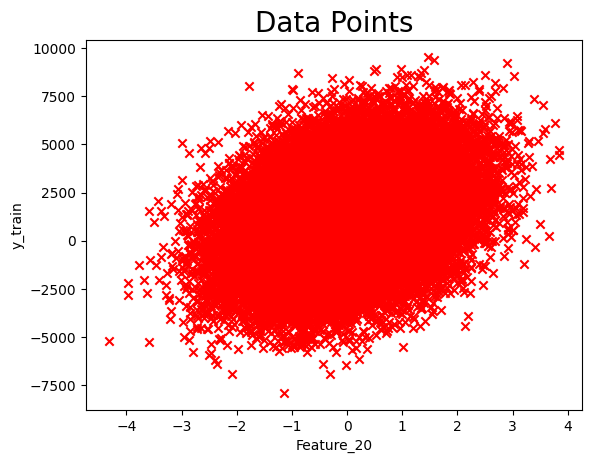

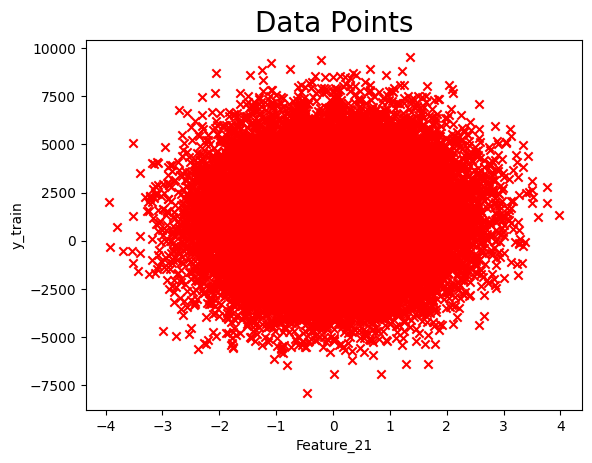

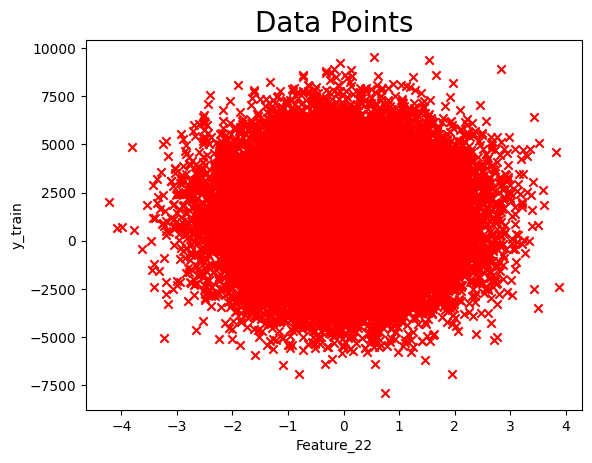

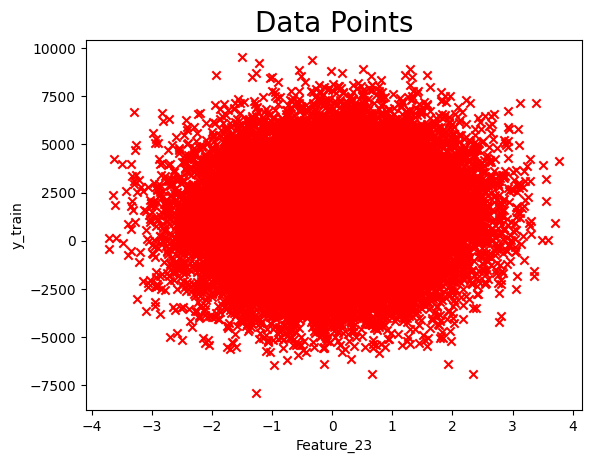

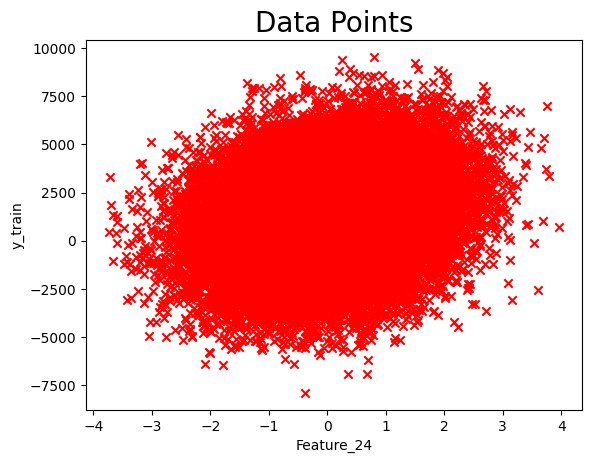

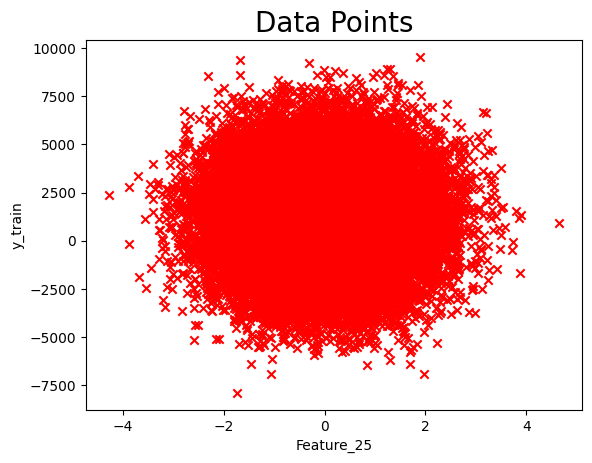

In [ ]:
for i in range(x_train.shape[1]):
  plt.scatter(x_train[:, i], y_train, marker='x', c='r')

  plt.title('Data Points', fontdict = {'fontsize' : 20})
  plt.ylabel('y_train')
  plt.xlabel('Feature_' + str(i + 1))                      # +1 because index will start from 0

  plt.show()

##**4. Model Initialization**

## **Defining Cost Function**

In [ ]:
def cost_function(x, y, a, b):
    m = x.shape[0]

    f_ab = np.dot(x, a) + b
    J_ab = np.sum((f_ab - y) ** 2) / (2 * m)

    return J_ab                                        # Mean Squared Error

## **5. Defining Gradient Descent**

`Defining Gradient`

In [ ]:
def gradient(x_train, y_train, a, b):
  m = x_train.shape[0]
  n = x_train.shape[1]

  f_ab = np.dot(x_train, a) + b

  dJ_da = (1 / m) * np.dot(x_train.T, ((f_ab - y_train)))
  dJ_db = (1 / m) * np.sum((f_ab - y_train))

  return dJ_da, dJ_db                                     # gradients

`Gradient Descent`

In [ ]:
def gradient_descent(x_train, y_train, a, b, alpha, num_iters, cost_function, gradient):

  J_history = []

  for i in range(num_iters):
    dJ_da, dJ_db = gradient(x_train, y_train, a, b)

    a_temp = a - (alpha) * dJ_da
    b_temp = b - (alpha) * dJ_db
    a = a_temp
    b = b_temp

    if i < 100000:
      J_history.append(cost_function(x_train, y_train, a, b))              # storing cost with every iteration for
                                                                            # plotting later.

    if i % (num_iters/10) <= 0.01:
      print(f"Iteration {i:6}: Cost {J_history[-1] :8.4f} ")

  return a, b, J_history

In [ ]:
n = x_train.shape[1]
a_int = np.zeros(n)           # initial value of a
b_int = 0                     # initial value of b

iterations = 1000
tmp_alpha = 0.01              # learning rate

%time

a_final, b_final, J_hist = gradient_descent(x_train ,y_train, a_int, b_int, tmp_alpha,
                                                    iterations, cost_function, gradient)

print(f"TRAIN COST estimated is = {J_hist[-1] :8.4f}")

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs
Iteration      0: Cost 3043863.7419 
Iteration    100: Cost 463235.6131 
Iteration    200: Cost 113014.3971 
Iteration    300: Cost 65436.9198 
Iteration    400: Cost 58967.1263 
Iteration    500: Cost 58086.4849 
Iteration    600: Cost 57966.5023 
Iteration    700: Cost 57950.1402 
Iteration    800: Cost 57947.9068 
Iteration    900: Cost 57947.6017 
TRAIN COST estimated is = 57947.5601


## **6. Mean Absolute Error**

In [ ]:
def mae(x, y, a, b):
    m = x.shape[0]

    f_ab = np.dot(x, a) + b

    J_ab = np.sum(np.abs(f_ab - y))
    J_ab = J_ab / m

    return J_ab

`Train Set`

In [ ]:
train_mae = mae(x_train, y_train, a_final, b_final)

print(f"Train MAE = {train_mae:8.4f}")

Train MAE = 272.3555


## **6. Learning Curve**

`Learning Curve`

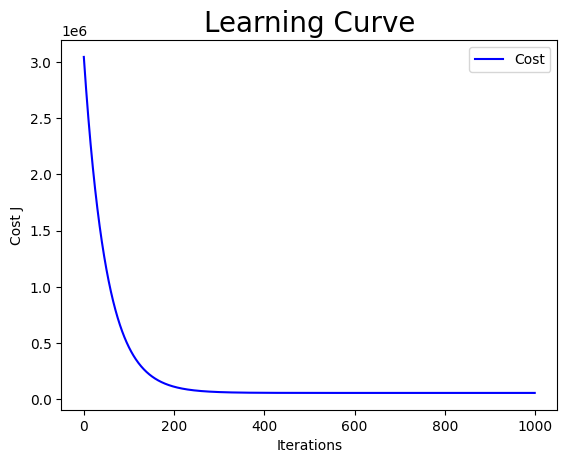

In [ ]:
plt.plot(np.arange(len(J_hist)), J_hist, 'b', label = 'Cost')
plt.title('Learning Curve', fontdict = {'fontsize' : 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')

plt.legend()

plt.show()




`Final Parameters`



In [ ]:
print(f'a_final = {a_final}')
print()
print(f"b_final = {b_final}")

a_final = [ 1.31375858e+02  8.98735314e-02  5.21360615e+02  7.36735158e+02
 -2.53059557e-01  8.10426690e+02  4.42575832e+02 -1.62454586e+00
  6.47053499e+02  2.26394029e+02  1.20809375e+00  6.82995228e-01
  7.61008131e+02  6.62969968e+02 -1.37538045e+00  5.28292487e+02
  3.07030597e+01  4.51529031e+02  4.12645377e+02  6.94744669e+02
  9.65091884e+01  2.53228734e+00  1.06010729e+02  4.93212960e+02
  1.17603339e+00]

b_final = 1247.9521969732289


`Visualising Feature Impacts`

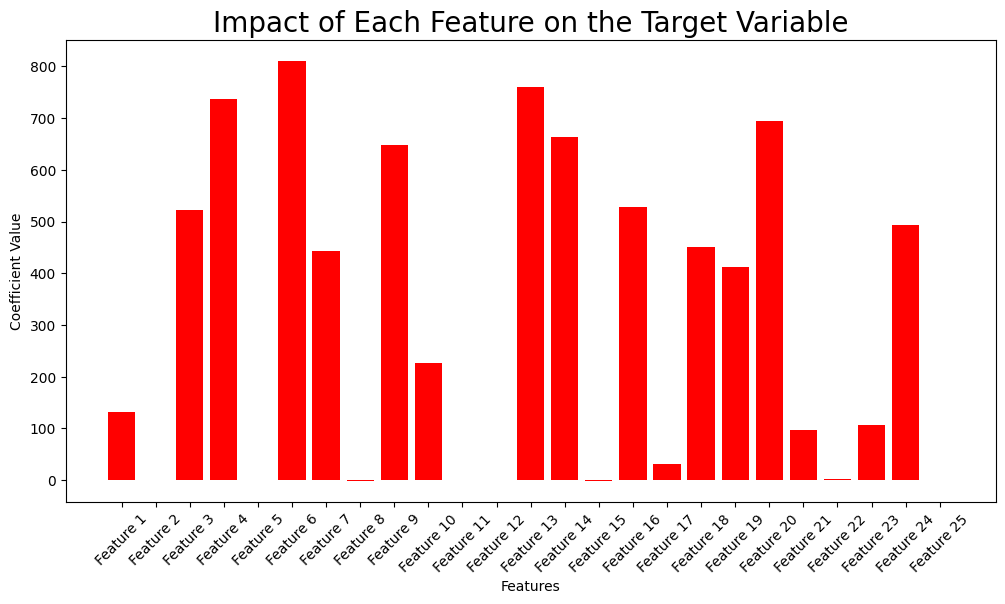

In [ ]:
features = [f'Feature {i + 1}' for i in range(n)]
plt.figure(figsize=(12, 6))

plt.bar(range(n), a_final, color = 'r')

plt.title("Impact of Each Feature on the Target Variable", fontdict={'fontsize': 20})
plt.xlabel("Features")
plt.ylabel("Coefficient Value")

plt.xticks(range(n), features, rotation=45)

plt.show()

##**7. Estimating Cross Validation Cost**

`CV Set`




In [ ]:
features_cv = df_cv.loc[:, 'Feature_1':'Feature_25']

x_cv = features_cv.to_numpy()
y_cv = df_cv['Target'].to_numpy()


`Same Normalization`




In [ ]:
x_cv = (x_cv - mean_train) / std_train


print(f"x_cv = {x_cv}")
print(f"y_cv = {y_cv}")

x_cv = [[ 0.67461693  1.3951581   0.70296098 ...  0.21022198  0.54804509
  -0.74732398]
 [-1.23107123 -1.04560552  0.57701409 ...  0.03565601 -0.16684599
   1.4493884 ]
 [ 0.08509077 -2.70093694  0.21745902 ...  0.71559404 -1.05975633
  -0.67343203]
 ...
 [-1.73689673 -1.66043239  0.30709349 ...  0.16451666 -0.85693332
   0.36610265]
 [-0.63618163 -0.01821903  0.28192941 ... -1.39542886 -0.12490664
   0.02278765]
 [ 0.05386553 -1.666086   -0.6519844  ... -0.70465076 -0.09785943
  -0.73716508]]
y_cv = [-355.84701352 1621.72103809 1020.67069956 ... 4674.20962833 1816.10852233
 6281.16426162]


In [ ]:
m_cv = x_cv.shape[0]
print(m_cv)

4800


`Computing Cross Validation Cost`

In [ ]:
Cross_Validation_Cost = cost_function(x_cv, y_cv, a_final, b_final)

print(f"Cross Validation Cost = {Cross_Validation_Cost:8.4f}")

Cross Validation Cost = 58699.2389


`Cross Validation Set MAE`

In [ ]:
cv_mae = mae(x_cv, y_cv, a_final, b_final)

print(f"CV MAE = {cv_mae:8.4f}")

CV MAE = 274.2362


##**8. Estimating Test Cost**

`Test Set`

In [ ]:
features_test = df_test.loc[:, 'Feature_1':'Feature_25']

x_test = features_test.to_numpy()
y_test = df_test['Target'].to_numpy()

`Same Normalization`

In [ ]:
x_test = (x_test - mean_train) / std_train


print(f"x_test = {x_test}")
print(f"y_test = {y_test}")

x_test = [[-0.87147576  1.09837589 -1.1651016  ... -1.10410196  1.16208859
   1.14400972]
 [-0.64311171 -0.84241682  0.0624552  ... -0.51721641  0.09831078
  -1.08429024]
 [-0.58503676 -1.74248657  0.24975776 ... -0.25625581  0.02029761
   0.14152193]
 ...
 [ 0.81949808  1.17330167  1.00144041 ... -0.82134008 -1.01742404
   2.16843956]
 [-1.07135056 -0.12371553  0.41734113 ...  2.76652666  0.61443903
  -0.31357427]
 [-0.21486289 -0.87191222 -2.26789153 ...  0.22598122 -2.83845991
   0.46656571]]
y_test = [  -77.18710217  1256.5507877    586.99289603 ... -1703.21936555
  4551.70684165 -2800.86325604]


In [ ]:
m_test = x_test.shape[0]
print(m_test)

4800


`Computing Test Cost`

In [ ]:
Test_Cost = cost_function(x_test, y_test, a_final, b_final)

print(f"Test Cost = {Test_Cost:8.4f}")

Test Cost = 58052.5140


`Test Set MAE`

In [ ]:
test_mae = mae(x_test, y_test, a_final, b_final)

print(f"Test MAE = {test_mae:8.4f}")

Test MAE = 273.0987


## **9. R2 Score**

In [ ]:
sst = np.sum((y_test - np.mean(y_test))**2)                               # Total sum of squares
sse = np.sum((y_test - (np.dot(x_test, a_final) + b_final))**2)           # Sum of squared errors
r2 = 1 - (sse / sst)

print(f'R2 score = {r2 * 100}%')

R2 score = 97.46064565927665%


## **9. Final Model**

In [ ]:
def Linear_regression(x, a_final, b_final):
  x = (x - mean_train) / std_train
  f_ab = np.dot(x, a_final) + b_final
  return f_ab

## **10. Visualising Final Model**

`Individual Features Plots (just for visualisation and have limited physical significance)`

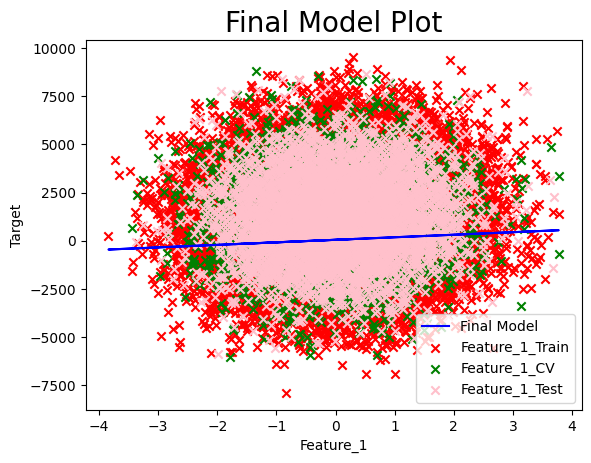

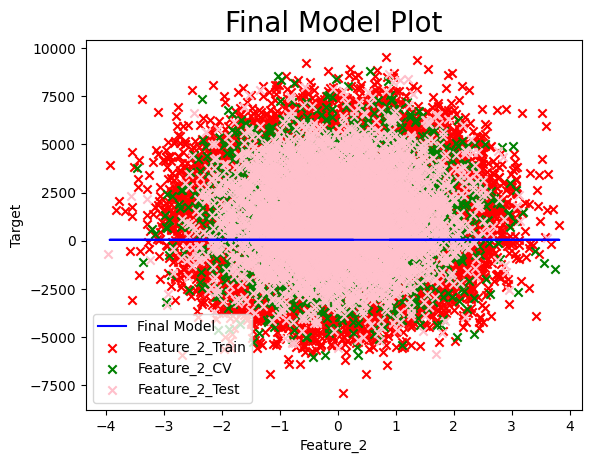

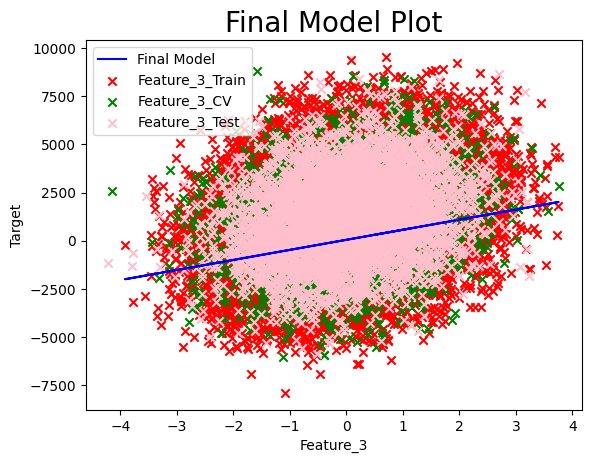

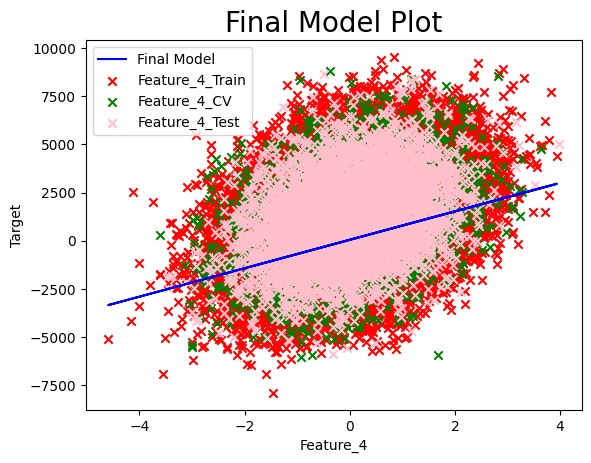

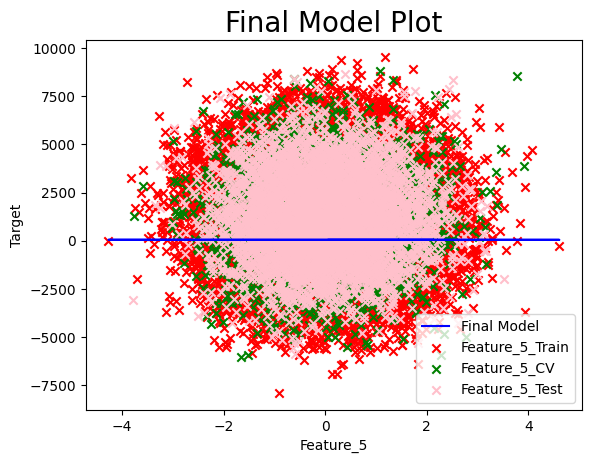

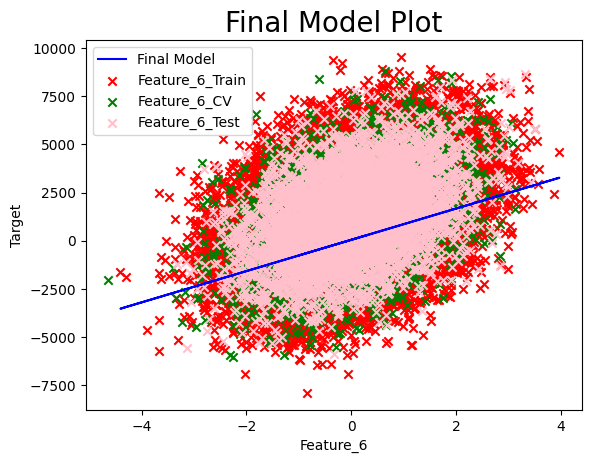

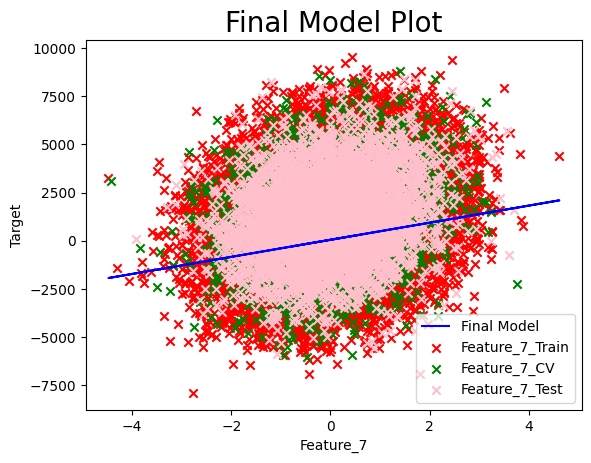

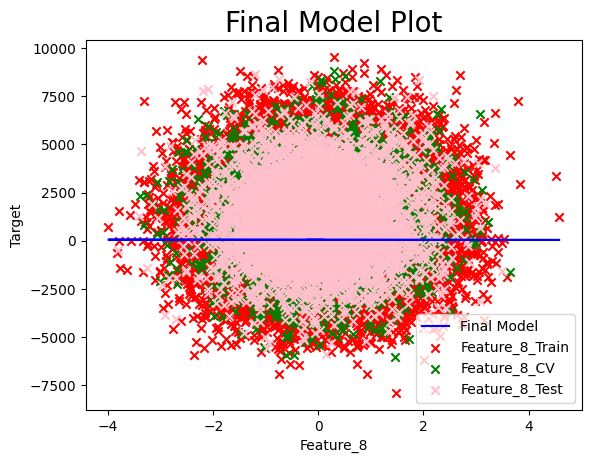

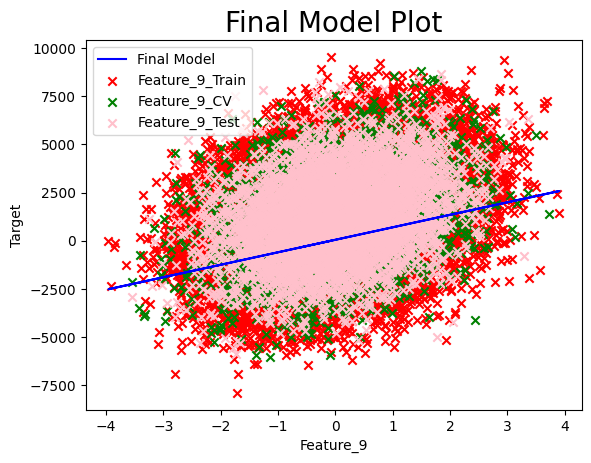

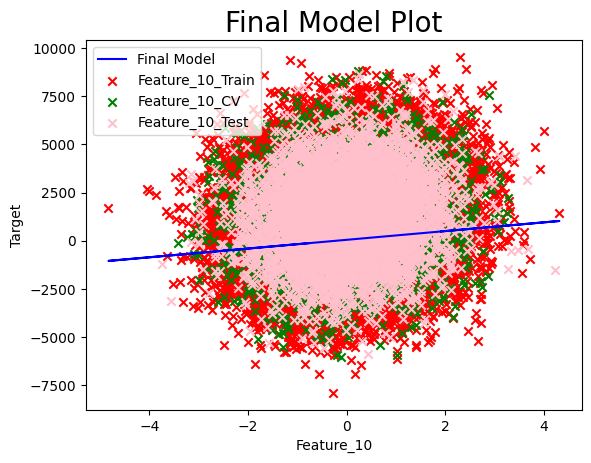

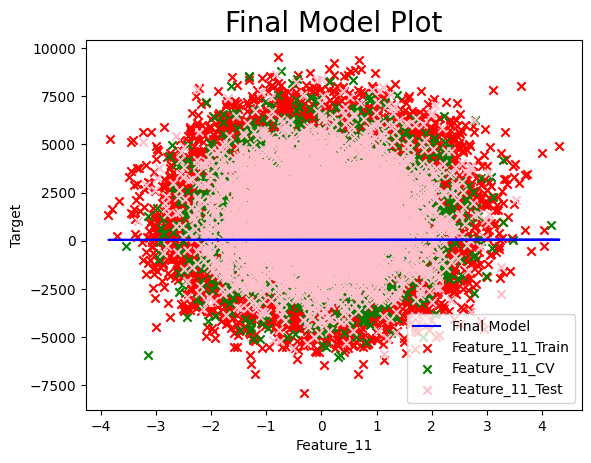

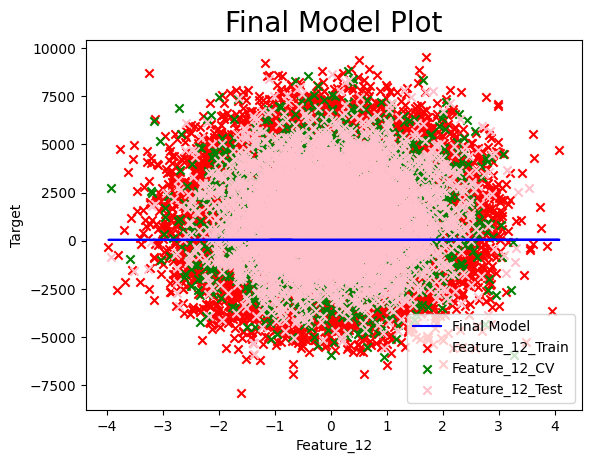

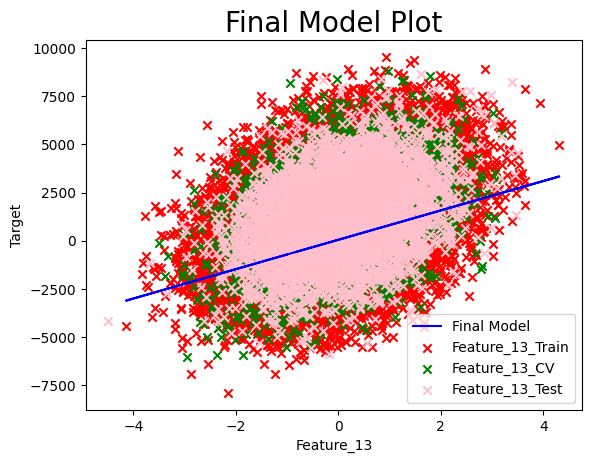

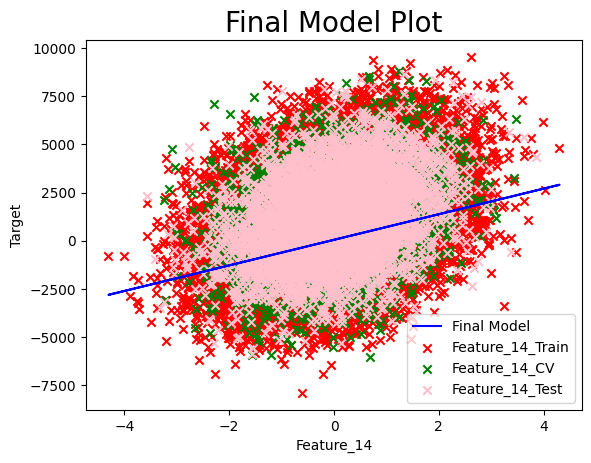

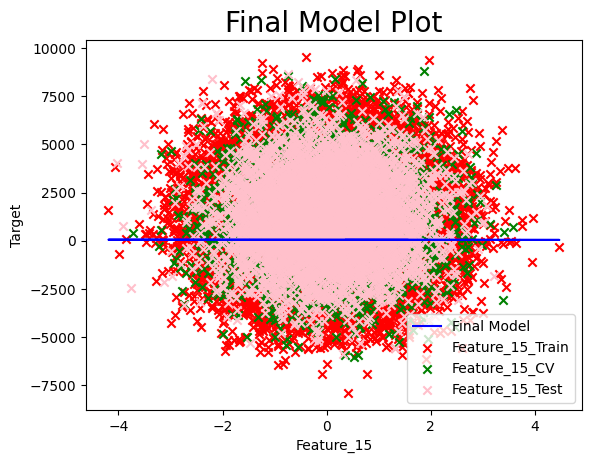

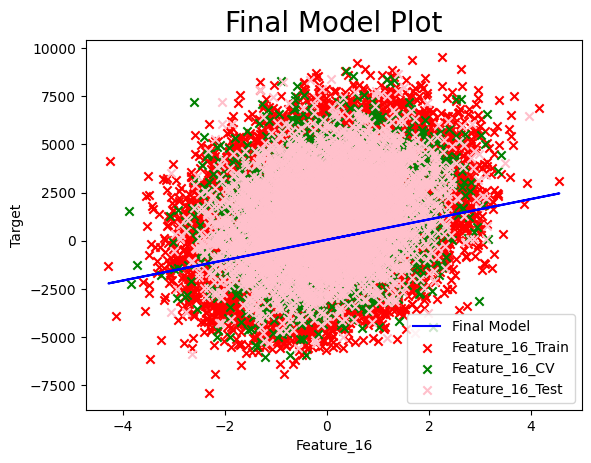

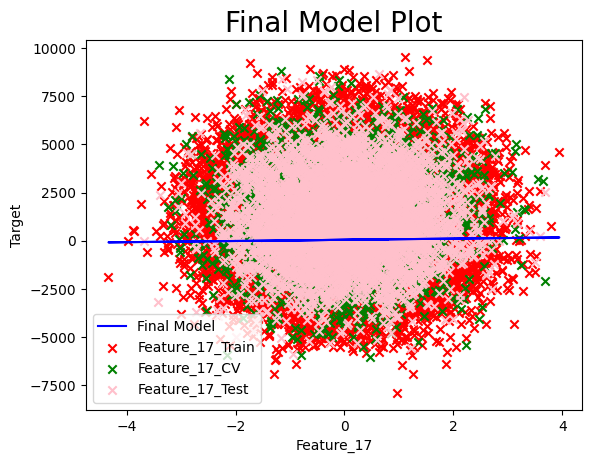

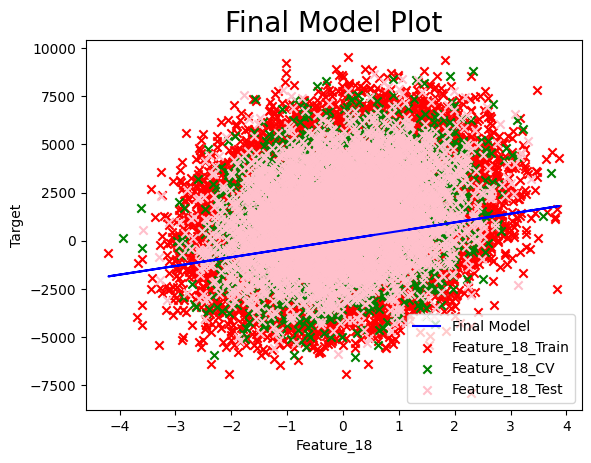

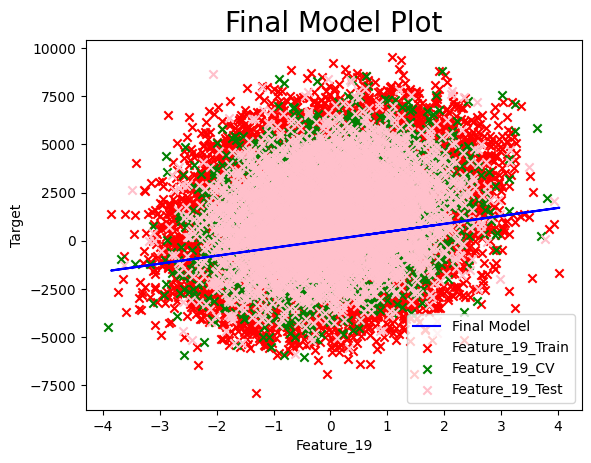

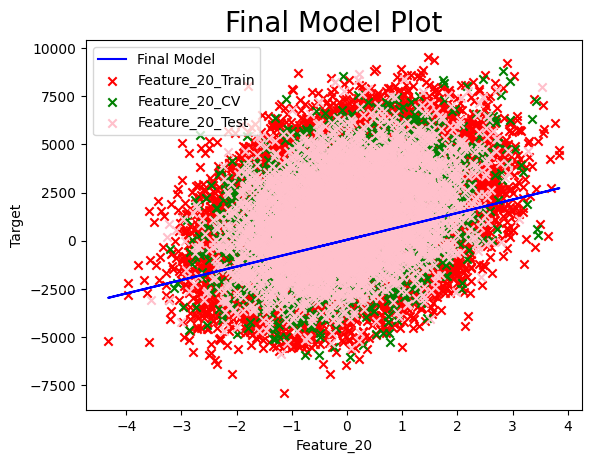

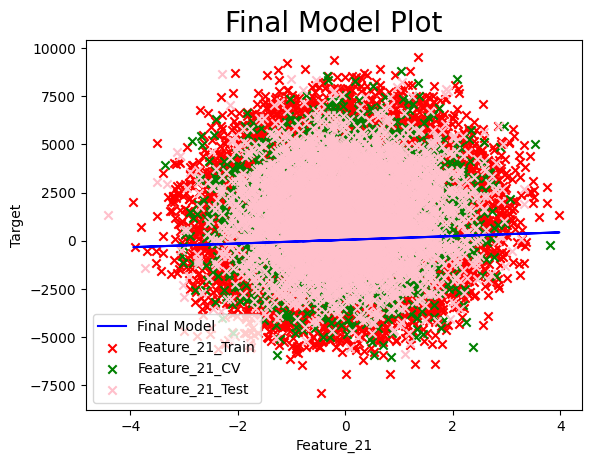

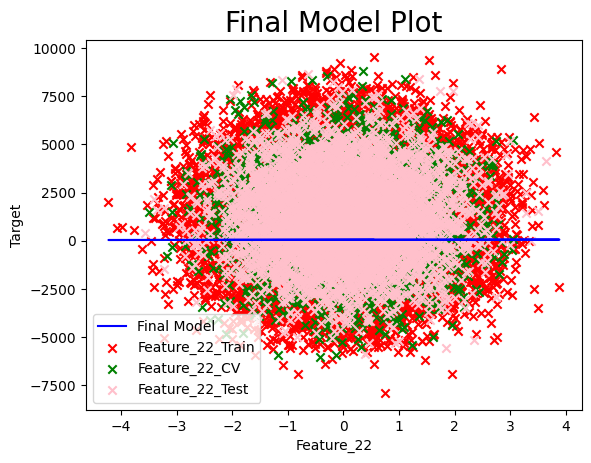

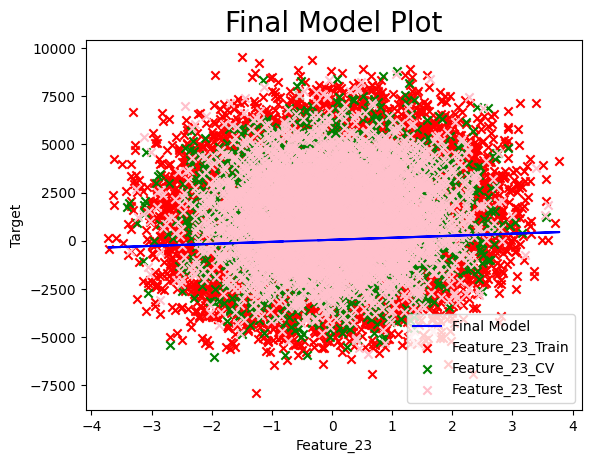

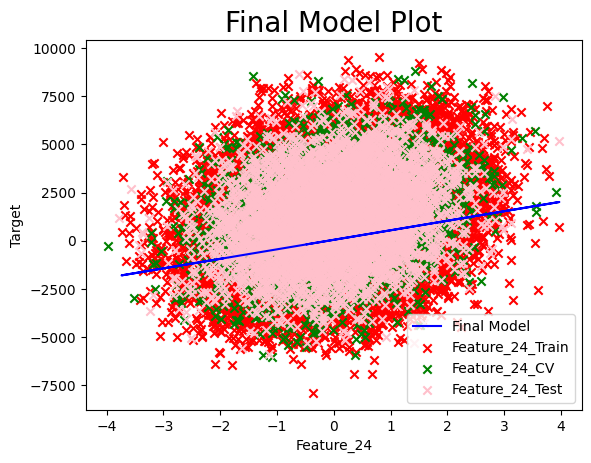

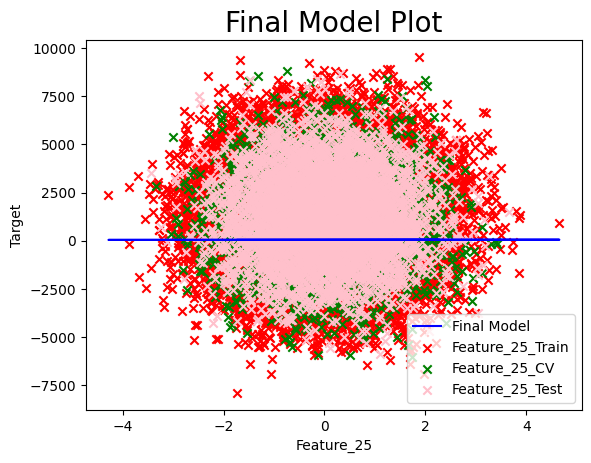

In [ ]:
n = x_train.shape[1]
for i in range(n):

  plt.plot(x_train[:, i], (np.dot(x_train[:, i], a_final[i]) + (b_final/n)), 'b-', label = 'Final Model')   # Final Model

  plt.scatter(x_train[:, i], y_train, marker='x', c='r', label = f'Feature_{i + 1}_Train')                  # Train Set

  plt.scatter(x_cv[:, i], y_cv, marker='x', c='g', label = f'Feature_{i + 1}_CV')                           # CV Set

  plt.scatter(x_test[:, i], y_test, marker='x', c='pink', label = f'Feature_{i + 1}_Test')                  # Test Set


  plt.title('Final Model Plot', fontdict = {'fontsize' : 20})
  plt.ylabel('Target')
  plt.xlabel('Feature_' + str(i + 1))
  plt.legend()
  plt.show()

## **10. Prediction Official Test Set**

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/linear_regression_test.csv', delimiter = ',')        # reading test set
df_test = df_test.drop(columns = ['ID'])
print(df_test.shape)

(12000, 25)


`Test Set`

In [ ]:
features_test = df_test.loc[:, 'Feature_1':'Feature_25']
x_test = features_test.to_numpy()

x_test = (x_test - mean_train) / std_train

print(f"x_test = {x_test}")

x_test = [[-1.988292    1.1682768   1.20935369 ...  1.14814712  0.28647052
  -1.5416536 ]
 [ 0.80546439  1.1133725  -1.02594442 ... -0.20872944  0.73431442
   1.3781905 ]
 [-0.01939893 -2.52356945 -1.18234752 ... -1.38237564 -0.19657987
   1.28886111]
 ...
 [-1.21909726 -1.42604662  0.03065548 ... -2.43964057  0.99653039
  -0.57998061]
 [ 1.49688046 -2.99396543  1.40811219 ... -0.14297854 -0.89391142
  -0.21745416]
 [-0.15128949  1.28784631  0.04838661 ...  0.23922018 -0.01592852
  -0.53006293]]


`Prediction for Test Set`

In [ ]:
prediction_test_set = np.array([])

prediction_test_set = np.append(prediction_test_set, np.dot(x_test, a_final) + b_final)

print(f'Prediction for test set = {prediction_test_set}')

Prediction for test set = [1070.22664485 4498.10772514 4052.47136485 ... 4960.98365616 -265.28971878
  532.62701079]


`Visualing Predictions`

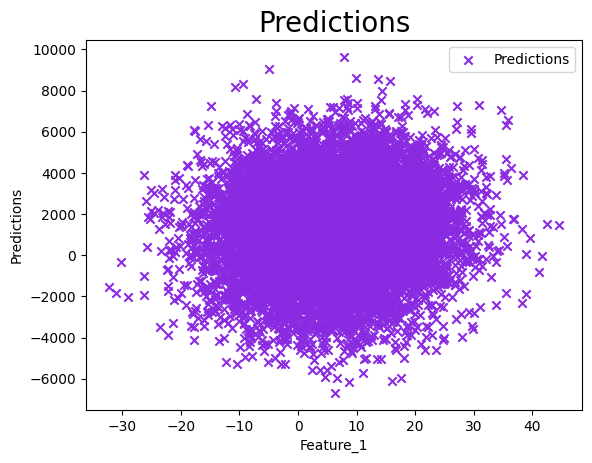

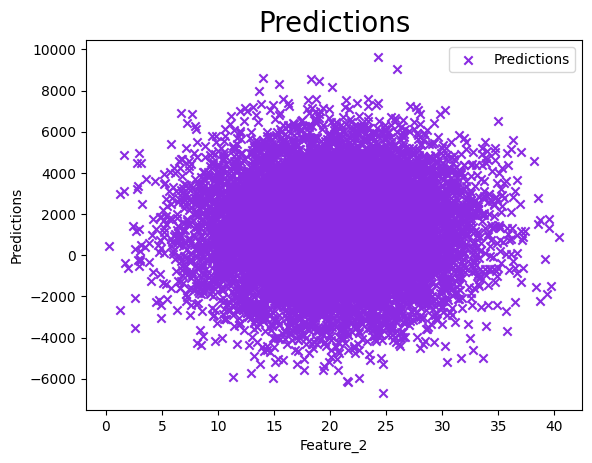

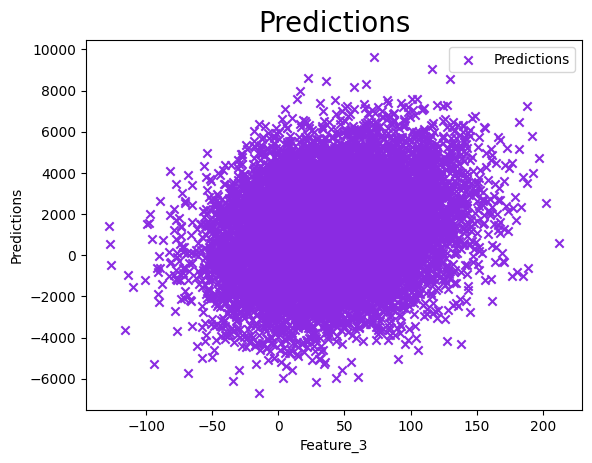

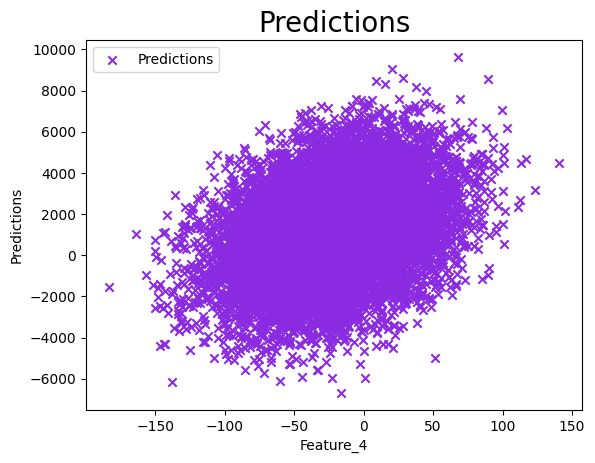

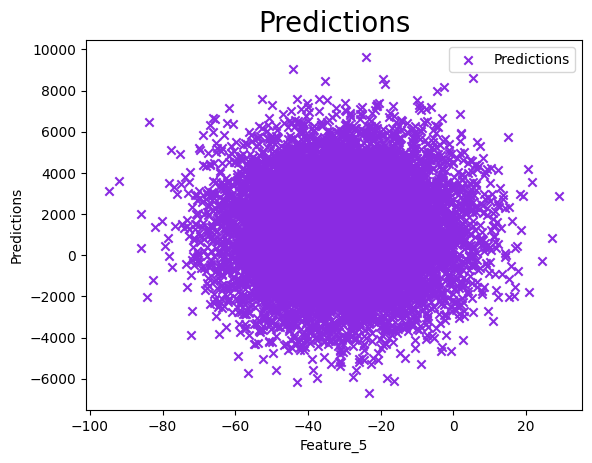

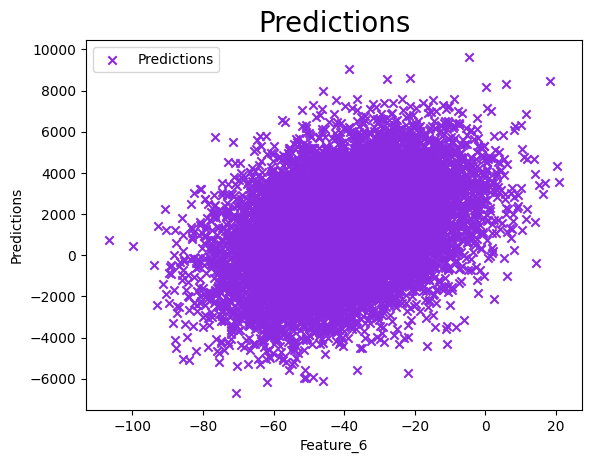

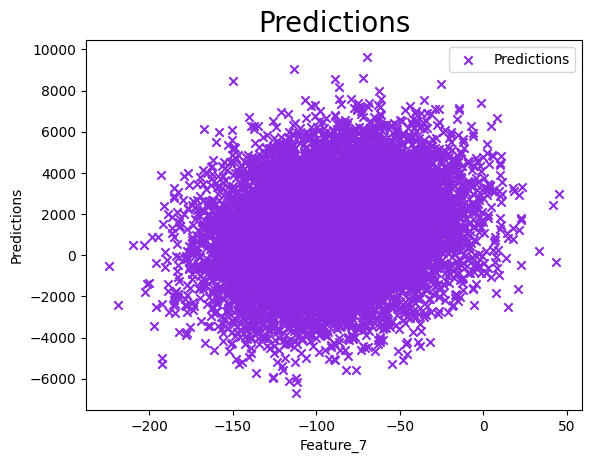

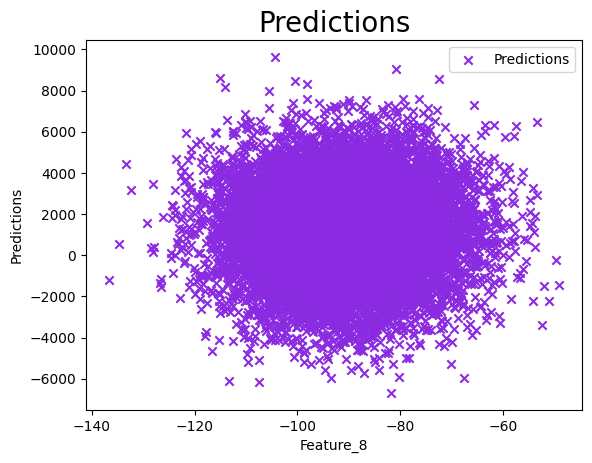

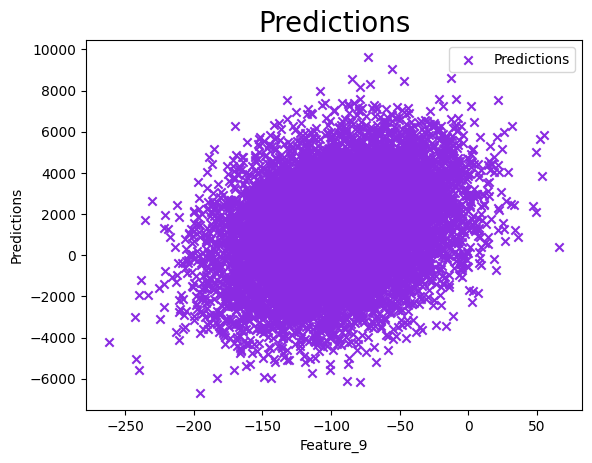

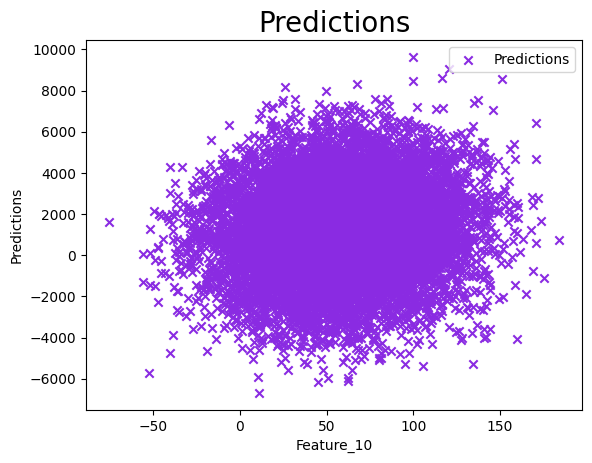

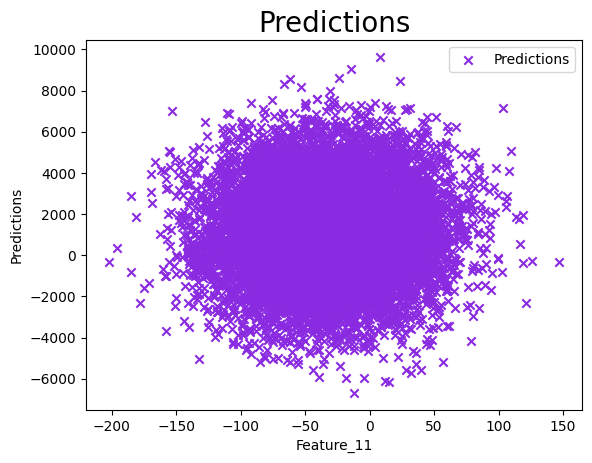

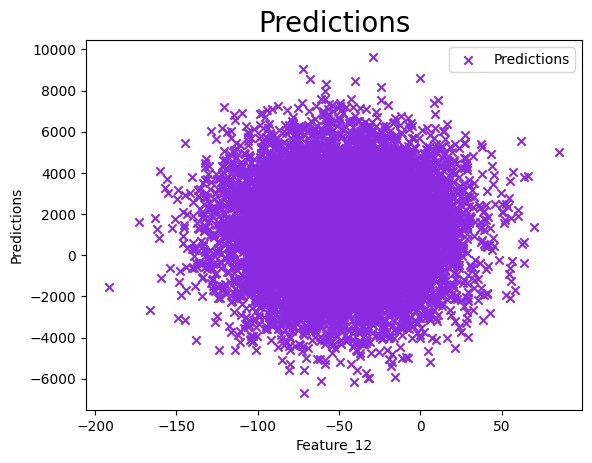

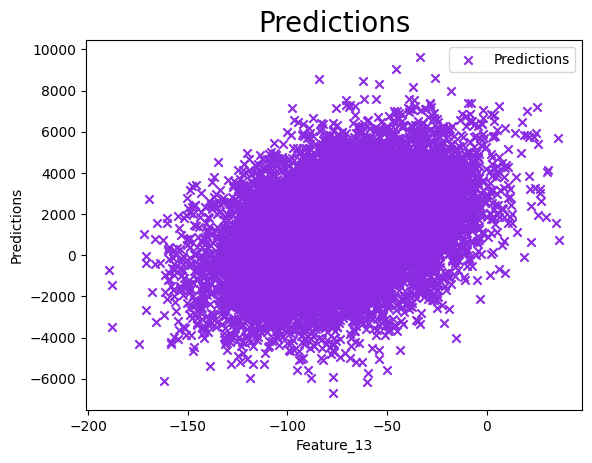

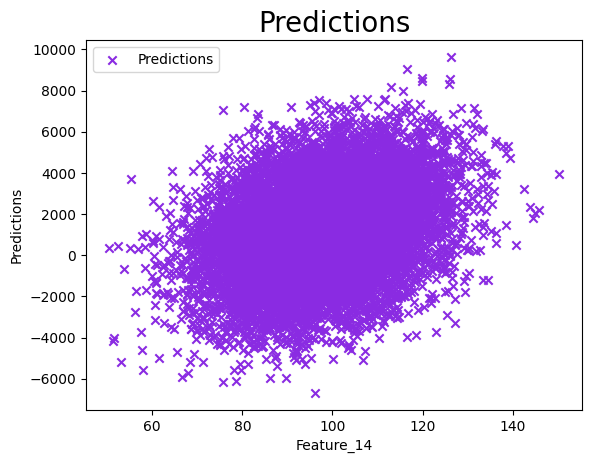

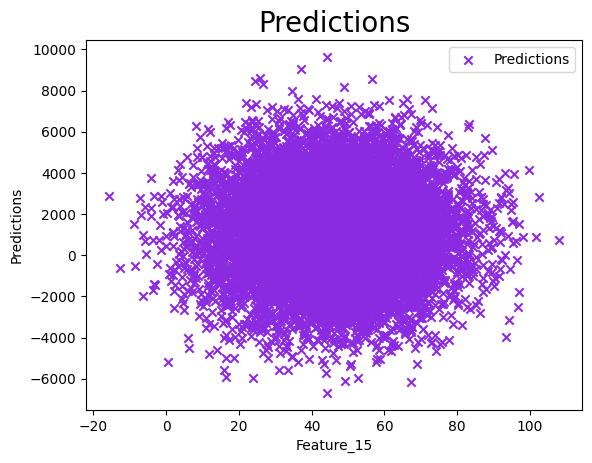

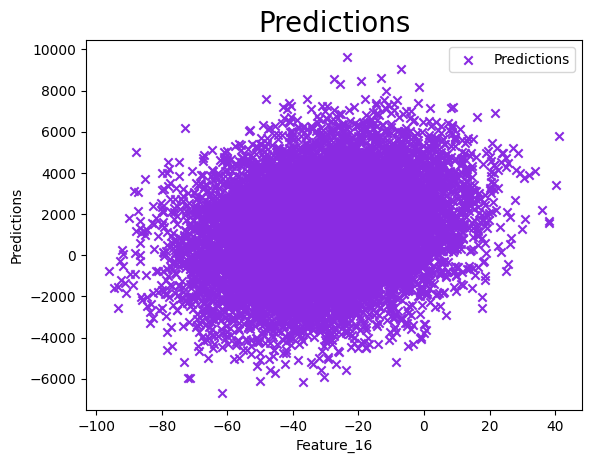

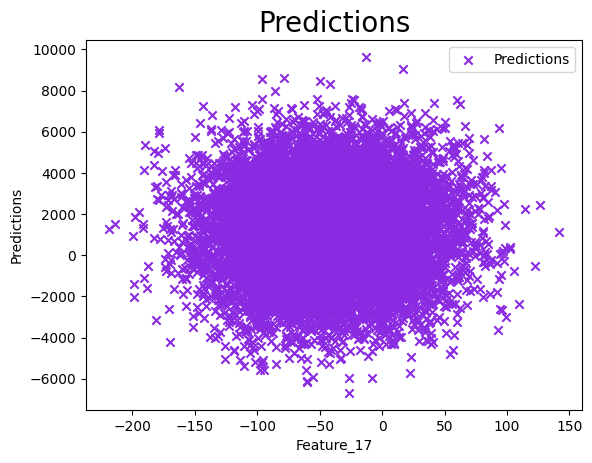

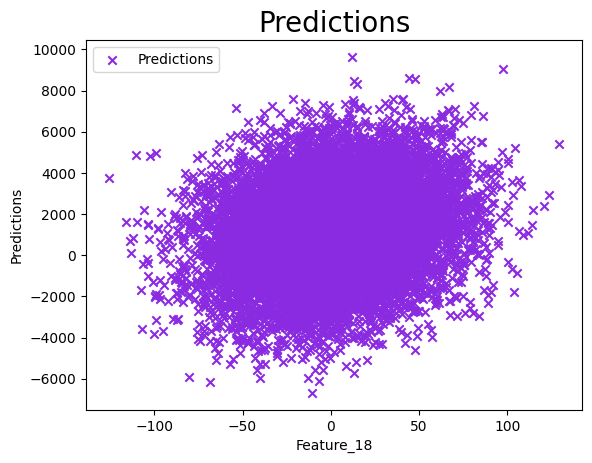

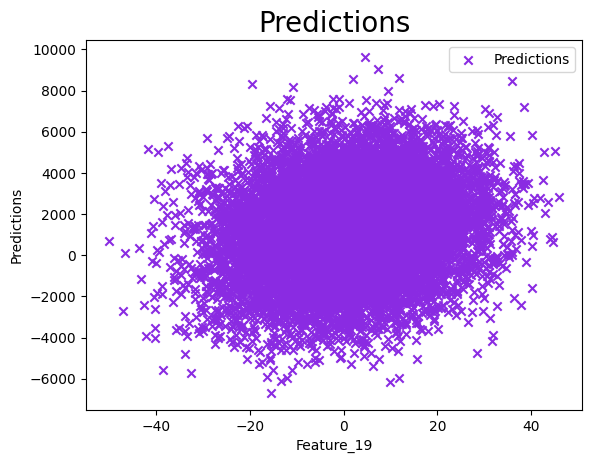

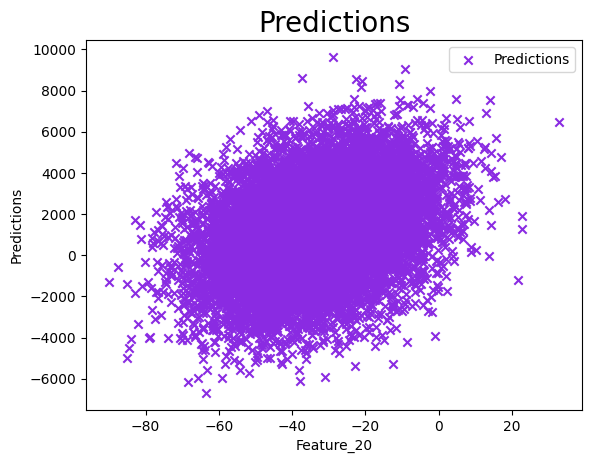

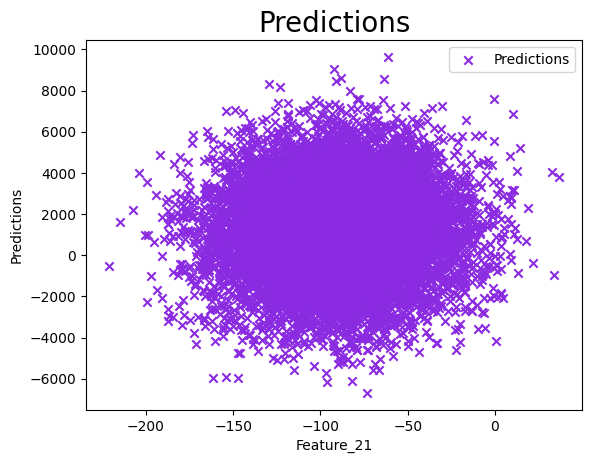

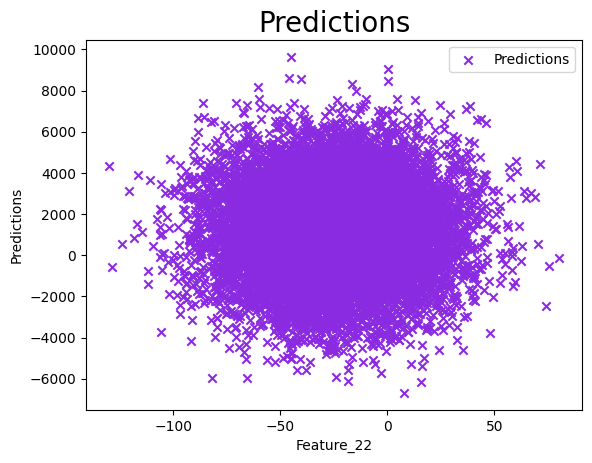

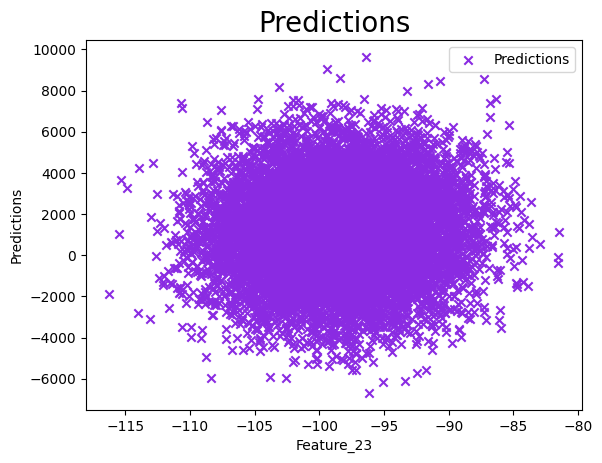

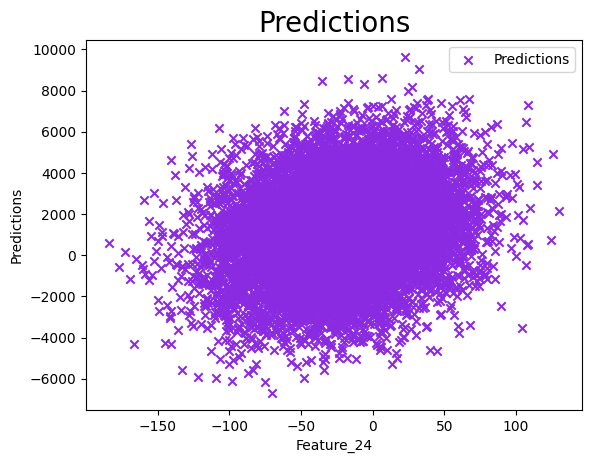

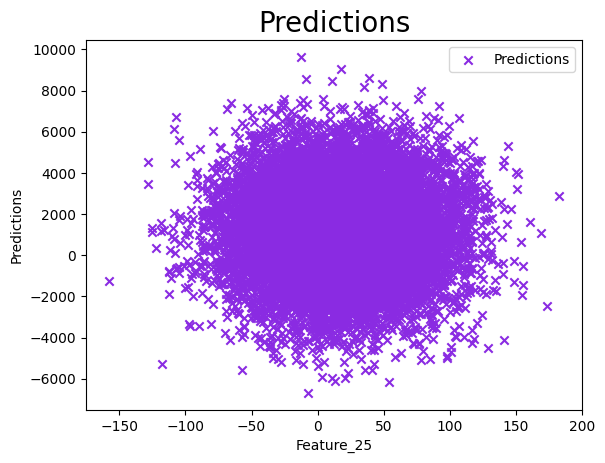

In [ ]:
x_test = x_test * std_train + mean_train

for i in range(x_test.shape[1]):
  plt.scatter(x_test[:, i], prediction_test_set, marker='x', c='#8A2BE2', label = 'Predictions')

  plt.title('Predictions', fontdict = {'fontsize' : 20})
  plt.ylabel('Predictions')
  plt.xlabel('Feature_' + str(i + 1))

  plt.legend()

  plt.show()

`Saved the prediction in Google Drive`

In [ ]:
# df = pd.DataFrame(prediction_test_set)
# df.columns = ['Prediction_linearregression']
# df.to_csv('/content/drive/MyDrive/linear_regression_test_prediction.csv', index=False)

## **9. Prediction**

In [ ]:
x_input = np.array([])

for i in range(x_train.shape[1]):
  features = input(f'feature_{i+1} = ')
  x_input = np.append(x_input, np.array(float(features)))

x_input = (x_input - mean_train) / std_train


Prediction = np.dot(x_input, a_final) + b_final

print()

print(f"Prediction for Input x = {Prediction:12.7f}")

KeyboardInterrupt: Interrupted by user

`Visualising Prediction`

In [ ]:
x_input = x_input * std_train + mean_train

for i in range(x_input.shape[0]):
  plt.scatter(x_input[i], Prediction, marker='x', c='r', label = 'Prediction')

  plt.title('Prediction', fontdict = {'fontsize' : 20})
  plt.ylabel('Possible yhat')
  plt.xlabel('Feature_' + str(i + 1))

  plt.legend()

  plt.show()